In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
avocado_info = pd.read_csv("/kaggle/input/avocado-info-csv/avocado_info.csv")

In [3]:
avocado_info.head()

,Growth Duration,Fertilizer
0,98,True
1,108,False
2,129,False
3,116,False
4,111,False


In [4]:
fertilized = avocado_info.loc[avocado_info["Fertilizer"] == True, "Growth Duration"]

not_fertilized = avocado_info.loc[avocado_info["Fertilizer"] == False, "Growth Duration"]

In [5]:
np.random.choice(fertilized, size = len(fertilized))

array([101,  71,  97, 105, 119, 124, 143,  91, 117, 122,  98, 115, 120,
        94, 104,  93, 111, 144, 142,  88, 115, 112, 146, 121, 136,  78,
       146, 102, 104,  96, 103, 113, 129, 114, 108, 110,  84, 105, 103,
        82, 115,  72,  82, 115,  98, 115, 104,  91, 130, 101, 117, 102,
       110, 121, 154, 136, 127,  94, 117, 138,  65, 117, 122, 108, 132,
       103, 110, 130, 106,  87, 114, 115, 144,  86, 123, 131, 127, 148,
       130, 135, 146, 115,  92, 133, 116, 123, 141, 106, 122, 117, 146,
       103, 101, 119, 105, 125, 127, 132, 105, 128, 122, 130, 115, 119,
       131, 100,  72,  92, 141, 124, 113, 106,  95,  84, 117, 161,  86,
       128, 124, 125, 150, 125, 103, 122,  95, 156,  98, 113, 123, 117,
       101, 152, 130, 109, 119, 109, 132, 100,  98, 132, 105, 155, 115,
       120, 123, 163, 108, 105,  99, 131, 107, 118, 123,  97, 145, 119,
       116, 123, 163, 113, 100,  87, 144, 125,  77, 109,  87, 123, 117,
       104, 118, 123, 116,  96, 131, 100,  93, 119,  94, 131, 10

In [6]:
np.random.choice(not_fertilized, size = len(fertilized))

array([104, 126, 123,  65, 129, 138,  91, 114, 128, 127, 114, 114, 122,
       174, 131, 113, 123, 137, 117, 121,  91, 144, 139, 125, 139,  85,
       133, 137, 103, 120, 121, 104, 125, 119, 119, 131, 111, 119, 133,
       119, 134, 136, 127, 112, 105, 134, 119, 133,  85, 120, 120, 125,
       154, 100, 160, 116, 150, 140, 147, 120, 120, 115, 114, 126, 123,
       138, 130, 117, 117, 130, 124, 141, 123, 120, 126, 119, 108, 113,
       130, 137, 115, 138, 105, 146, 126, 111, 114, 151, 128, 129, 125,
       100, 113, 136, 144, 119, 140, 125, 134, 127, 100, 101, 125, 110,
       124, 116, 137, 125, 113,  91, 123, 115,  78, 136, 144, 160, 143,
       110,  97, 126, 136, 146, 118, 122, 138, 112,  98, 123, 132, 122,
       129, 136, 137, 128, 104, 143, 111, 137, 153, 143, 139, 140, 123,
       121, 128, 136, 134, 132, 143, 113, 129, 103, 109, 124, 134, 147,
       129, 176, 109, 141, 129, 174, 128, 131, 126, 140, 146, 119,  72,
       139, 124, 129, 153, 114, 140, 160,  93, 115, 113, 123, 10

In [7]:
def resample(orig_sample):
      return np.random.choice(orig_sample, size = len(orig_sample))

In [8]:
def bootstrap(orig_sample, reps):
    means = np.array([])
    for i in range(reps):
        new_sample = resample(orig_sample)
        new_mean = np.mean(new_sample)
        means = np. append(means, new_mean)
    return means

In [9]:
fertilized_means = bootstrap(fertilized, 10000)

not_fertilized_means = bootstrap(not_fertilized, 10000)

estimates = fertilized_means - not_fertilized_means

In [10]:
estimates

array([-10.24509652, -10.56300867,  -9.1247589 , ...,  -9.76627207,
        -7.12217195,  -9.21291345])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


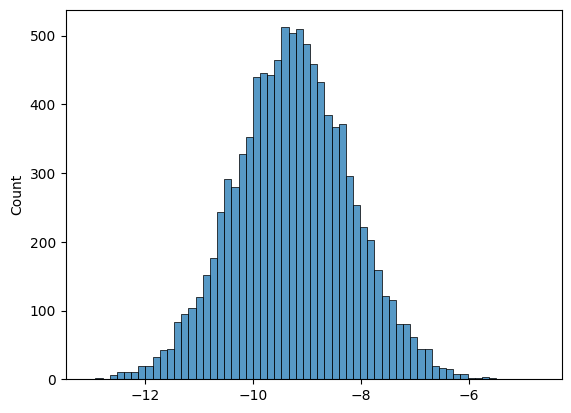

In [11]:
sns.histplot(estimates)
plt.show()

In [12]:
(np.percentile(estimates, 2.5), np.percentile(estimates, 97.5))

(-11.39491841491841, -7.127977665036484)